In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


file_directory = 'cardataset.csv'
df = pd.read_csv(file_directory)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Normalizing the data through some preprocessing to make them more consistent 

def preprocessor (df):
    df.columns = df.columns.str.replace(" ", "_").str.lower()
    
    for one_col in df.columns:
        if df[one_col].dtype == 'object':
            df[one_col] = df[one_col].str.replace(" ", "_").str.lower()
    return df

def long_tail_fixer(df):
    df['msrp'] = np.log1p(df ['msrp']) # msrp is the target variable 
    return df

def dummy_added (X):
    ones = np.ones(X.shape[0])
    return np.column_stack([ones, X])

def normal_eq(X, y):
    X = dummy_added(X)
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

def regularized_normal_eq(X, y, alpha):
        X = dummy_added(X)
        reg_term = np.eye(np.dot(X.T, X).shape[0]) * alpha 
        return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + reg_term), X.T), y)    

def prediction (X, X_train, y_train):
    w = normal_eq (X_train, y_train)
    return np.dot(X, w)

def prediction_regularized (X, X_train, y_train, alpha):
    w = regularized_normal_eq (X_train, y_train, alpha)
    return np.dot(X, w)

def rmse (y_pred, y_true):
    e    = y_pred - y_true
    se   = np.square(e)
    mse  = np.mean(se)
    rmse = np.sqrt(mse)
    return rmse

def category_maker(df, col_name_list):
    return pd.get_dummies(df, columns=[col_name_list])  

def name_corrector (df, col_name):
    common_list_name_corrected = [] 
    common_list = list(df[col_name].value_counts().head().index)
    for one_item in common_list:
        common_list_name_corrected.append(col_name + '_'+  str(one_item))
    return common_list_name_corrected

def categorical_columns (df, col_name):
    return category_maker (df, col_name)[name_corrector (df, col_name)]

def dataframe_creator (df1, df2):
    return pd.concat ([df1, df2], axis = 1)

def plotter(y_pred, y_true, y):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

    sns.histplot(y_pred, label='prediction', color='black', ax=axs[0])
    sns.histplot(y_true, label='target', color='red', ax=axs[0])
    axs[0].legend()
    axs[0].set_xlabel('Price')
    axs[0].set_ylabel('Frequency')

    axs[1].scatter(y_true, y_pred, color='lightblue')
    axs[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    axs[1].set_xlabel('True values')
    axs[1].set_ylabel('Predicted values')

    plt.show()

def splitter (X, y, test_size_1 = 0.2, test_size_2 = 0.25, random_state=2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size_2, random_state=random_state)
    print("Train set shape:", X_train.shape, y_train.shape)
    print("Validation set shape:", X_val.shape, y_val.shape)
    print("Test set shape:", X_test.shape, y_test.shape)

    return X_train, X_test, X_val, y_train, y_test, y_val



# Exploratory Data Analysis

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.shape

(11914, 16)

In [6]:
for i, col in enumerate (df.columns):
    print (i, col)

0 Make
1 Model
2 Year
3 Engine Fuel Type
4 Engine HP
5 Engine Cylinders
6 Transmission Type
7 Driven_Wheels
8 Number of Doors
9 Market Category
10 Vehicle Size
11 Vehicle Style
12 highway MPG
13 city mpg
14 Popularity
15 MSRP


In [7]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [8]:
df = preprocessor(df)
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


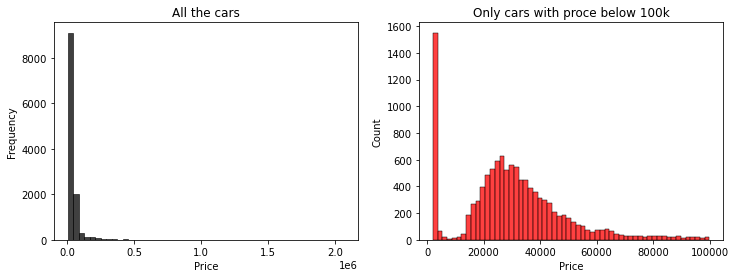

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(df['msrp'], bins = 50,  ax=axs[0],  color = 'black')
sns.histplot(df.loc[df['msrp'] < 100_000, 'msrp'], ax=axs[1], color = 'red')#, bins = 40)
axs[0].set_title('All the cars')
axs[1].set_title('Only cars with proce below 100k')

for ax in axs:
    ax.set_xlabel('Price')
axs[0].set_ylabel('Frequency')
plt.show()


In [10]:
long_tail_fixer(df)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,10.448744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,10.739024
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,10.945018
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,10.832122
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,10.838031


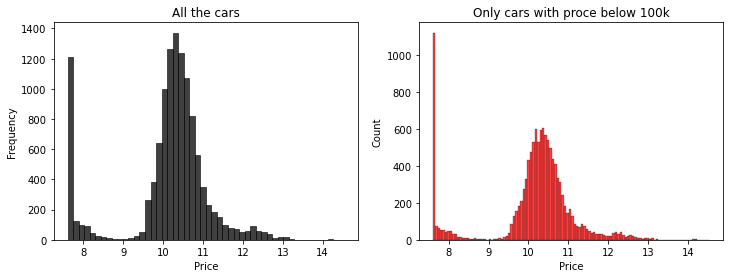

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(df['msrp'], bins = 50,  ax=axs[0],  color = 'black')
sns.histplot(df.loc[df['msrp'] < 100_000, 'msrp'], ax=axs[1], color = 'red')#, bins = 40)
axs[0].set_title('All the cars')
axs[1].set_title('Only cars with proce below 100k')

for ax in axs:
    ax.set_xlabel('Price')
axs[0].set_ylabel('Frequency')
plt.show()


In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [13]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                 float64
dtype: object

In [14]:
num_col = []
for one_col in df.columns:
    if df[one_col].dtype != 'O':
        num_col.append(one_col)
num_col

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'msrp']

In [15]:
selected_num_col = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
X = df[selected_num_col]
X

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
11909,300.0,6.0,23,16,204
11910,300.0,6.0,23,16,204
11911,300.0,6.0,23,16,204
11912,300.0,6.0,23,16,204


In [16]:
y = df['msrp']
y

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

In [17]:
y.isnull().sum()

0

In [18]:
X.isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [19]:
X = X.fillna(0)

In [20]:
X.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [21]:
X_train, X_test, X_val, y_train, y_test, y_val = splitter (X, y) 

Train set shape: (7148, 5) (7148,)
Validation set shape: (2383, 5) (2383,)
Test set shape: (2383, 5) (2383,)


In [22]:
y_pred = prediction (dummy_added(X_val) , X_train, y_train)

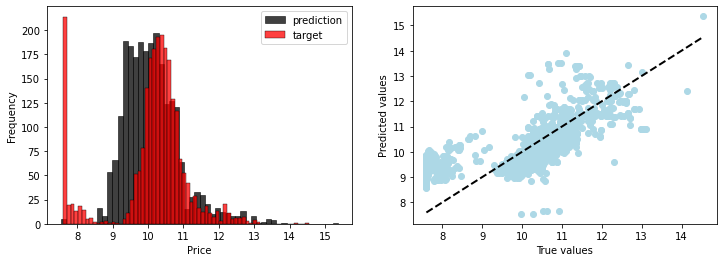

In [23]:
plotter(y_pred, y_val, y)

In [24]:
rmse (y_pred, y_val)

0.7578438219863882

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [26]:
df = df.fillna(0)

In [27]:
df['year'].max()

2017

In [28]:
df['age'] = df['year'].max() - df['year']
selected_num_col_2 = selected_num_col + ['age']
selected_num_col_2
X_2 = df[selected_num_col_2]
X_2

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,age
0,335.0,6.0,26,19,3916,6
1,300.0,6.0,28,19,3916,6
2,300.0,6.0,28,20,3916,6
3,230.0,6.0,28,18,3916,6
4,230.0,6.0,28,18,3916,6
...,...,...,...,...,...,...
11909,300.0,6.0,23,16,204,5
11910,300.0,6.0,23,16,204,5
11911,300.0,6.0,23,16,204,5
11912,300.0,6.0,23,16,204,4


In [29]:
X_train, X_test, X_val, y_train, y_test, y_val = splitter (X_2, y)

Train set shape: (7148, 6) (7148,)
Validation set shape: (2383, 6) (2383,)
Test set shape: (2383, 6) (2383,)


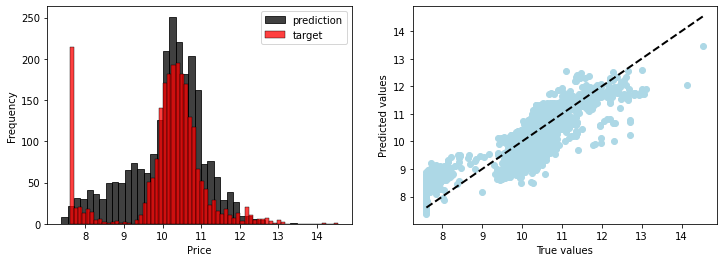

In [30]:
y_pred = prediction (dummy_added(X_val) , X_train, y_train)
plotter(y_pred, y_val, y)

In [31]:
rmse (y_pred, y_val)

0.513659841656812

In [32]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                 float64
age                    int64
dtype: object

In [33]:
df['number_of_doors'].unique()

array([2., 4., 3., 0.])

In [34]:
X_3 = dataframe_creator(X_2, categorical_columns (df, 'number_of_doors').iloc[:, 0:3])
X_3

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,age,number_of_doors_4.0,number_of_doors_2.0,number_of_doors_3.0
0,335.0,6.0,26,19,3916,6,0,1,0
1,300.0,6.0,28,19,3916,6,0,1,0
2,300.0,6.0,28,20,3916,6,0,1,0
3,230.0,6.0,28,18,3916,6,0,1,0
4,230.0,6.0,28,18,3916,6,0,1,0
...,...,...,...,...,...,...,...,...,...
11909,300.0,6.0,23,16,204,5,1,0,0
11910,300.0,6.0,23,16,204,5,1,0,0
11911,300.0,6.0,23,16,204,5,1,0,0
11912,300.0,6.0,23,16,204,4,1,0,0


In [35]:
X_train, X_test, X_val, y_train, y_test, y_val = splitter (X_3, y)

Train set shape: (7148, 9) (7148,)
Validation set shape: (2383, 9) (2383,)
Test set shape: (2383, 9) (2383,)


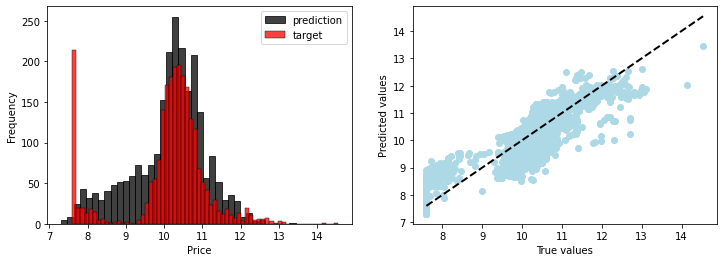

In [36]:
y_pred = prediction (dummy_added(X_val) , X_train, y_train)
plotter(y_pred, y_val, y)

In [37]:
rmse (y_pred, y_val)

0.5112731848943146

In [38]:
cat_columns = [] 
for one_col in df.columns:
    if df[one_col].dtype == 'object':
        cat_columns.append(one_col)
df_cat = df[cat_columns]       
(df_cat.count() / df_cat.nunique()).sort_values(ascending=False)

vehicle_size         3971.333333
driven_wheels        2978.500000
transmission_type    2382.800000
engine_fuel_type     1083.090909
vehicle_style         744.625000
make                  248.208333
market_category       165.472222
model                  13.035011
dtype: float64

In [39]:
df_cat.nunique()

make                  48
model                914
engine_fuel_type      11
transmission_type      5
driven_wheels          4
market_category       72
vehicle_size           3
vehicle_style         16
dtype: int64

In [40]:
df.loc[df['market_category'] == 0, 'market_category'] = '0'

In [41]:
X_4 = dataframe_creator(X_3, categorical_columns (df, 'vehicle_size'))
X_5 = dataframe_creator(X_4, categorical_columns (df, 'driven_wheels'))
X_6 = dataframe_creator(X_5, categorical_columns (df, 'transmission_type'))
X_7 = dataframe_creator(X_6, categorical_columns (df, 'engine_fuel_type'))
X_8 = dataframe_creator(X_7, categorical_columns (df, 'vehicle_style'))
X_9 = dataframe_creator(X_8, categorical_columns (df, 'make'))
X_10 = dataframe_creator(X_9, categorical_columns (df, 'market_category'))
X_11 = dataframe_creator(X_10, categorical_columns (df, 'model'))
X_12 = dataframe_creator(X_11, categorical_columns (df, 'make'))
X_12


,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,age,number_of_doors_4.0,number_of_doors_2.0,number_of_doors_3.0,vehicle_size_compact,...,model_silverado_1500,model_tundra,model_f-150,model_sierra_1500,model_beetle_convertible,make_chevrolet,make_ford,make_volkswagen,make_toyota,make_dodge
0,335.0,6.0,26,19,3916,6,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,300.0,6.0,28,19,3916,6,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,300.0,6.0,28,20,3916,6,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,230.0,6.0,28,18,3916,6,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,230.0,6.0,28,18,3916,6,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,300.0,6.0,23,16,204,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,300.0,6.0,23,16,204,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,300.0,6.0,23,16,204,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,300.0,6.0,23,16,204,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train, X_test, X_val, y_train, y_test, y_val = splitter (X_4, y)

Train set shape: (7148, 12) (7148,)
Validation set shape: (2383, 12) (2383,)
Test set shape: (2383, 12) (2383,)


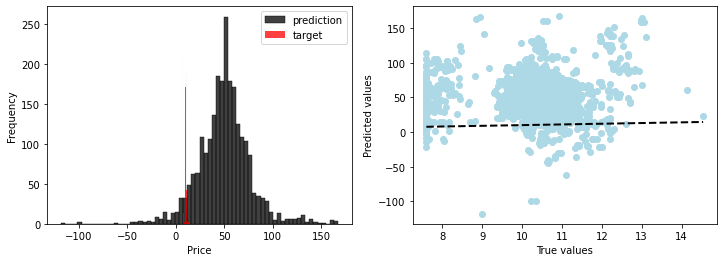

In [43]:
y_pred = prediction (dummy_added(X_val) , X_train, y_train)
plotter(y_pred, y_val, y)

In [44]:
rmse (y_pred, y_val)

48.465991435253656

In [45]:
X_train, X_test, X_val, y_train, y_test, y_val = splitter (X_5, y)

Train set shape: (7148, 16) (7148,)
Validation set shape: (2383, 16) (2383,)
Test set shape: (2383, 16) (2383,)


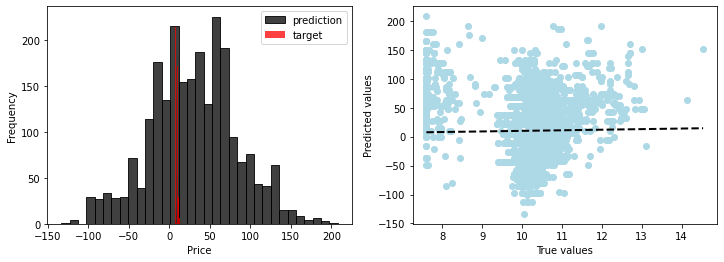

In [46]:
y_pred = prediction (dummy_added(X_val) , X_train, y_train)
plotter(y_pred, y_val, y)

In [47]:
rmse (y_pred, y_val)

56.58528906145277

In [48]:
X_train, X_test, X_val, y_train, y_test, y_val = splitter (X_12, y)

Train set shape: (7148, 51) (7148,)
Validation set shape: (2383, 51) (2383,)
Test set shape: (2383, 51) (2383,)


In [49]:
y_pred = prediction (dummy_added(X_val) , X_train, y_train)
plotter(y_pred, y_val, y)

LinAlgError: Singular matrix

### This Singularity error is due to numerical instability and the inverse term in the normal equation fails! So I try reqularization:

In [50]:
X_train, X_test, X_val, y_train, y_test, y_val = splitter (X_12, y)

Train set shape: (7148, 51) (7148,)
Validation set shape: (2383, 51) (2383,)
Test set shape: (2383, 51) (2383,)


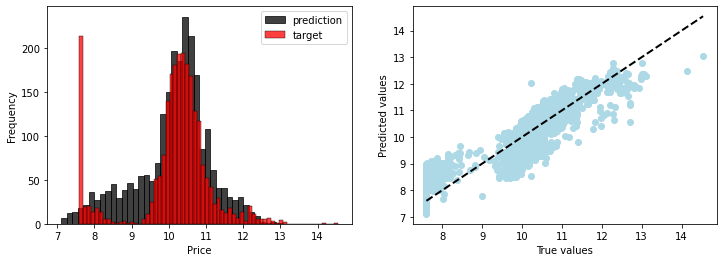

In [51]:
y_pred = prediction_regularized (dummy_added(X_val) , X_train, y_train, alpha=0.01)
plotter(y_pred, y_val, y)

In [52]:
rmse (y_pred, y_val)

0.4558851276491289

In [53]:
for alpha in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    y_pred = prediction_regularized (dummy_added(X_val) , X_train, y_train, alpha)
    rmse_val = rmse (y_pred, y_val)
    w = regularized_normal_eq(X_train, y_train, alpha)
    format_string = 'alpha: {:<8} rmse = {:<20.14f} w_0 = {:<20.14f} w_13 = {:<20.14f}'
    print(format_string.format(alpha, rmse_val, w[0], w[13]))


alpha: 1e-06    rmse = 0.45588581608837     w_0 = 320.65445185136002   w_13 = 0.82198906883127    
alpha: 0.0001   rmse = 0.45588622121166     w_0 = 6.39900683787277     w_13 = 1.62128504086932    
alpha: 0.001    rmse = 0.45588612165949     w_0 = 6.36745123205660     w_13 = 1.62092568049998    
alpha: 0.01     rmse = 0.45588512764913     w_0 = 6.35441143277551     w_13 = 1.61778861194616    
alpha: 0.1      rmse = 0.45587512062400     w_0 = 6.24178125664213     w_13 = 1.58876968620770    
alpha: 1        rmse = 0.45589875405981     w_0 = 5.60027060004757     w_13 = 1.42130577800553    
alpha: 5        rmse = 0.45951568058892     w_0 = 4.72262881547863     w_13 = 1.18294128763043    
alpha: 10       rmse = 0.46726318934670     w_0 = 4.25269122979837     w_13 = 1.05353317395955    


In [54]:
ad = {
'city_mpg': 18,'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2013
}
ad

{'city_mpg': 18,
 'driven_wheels': 'all_wheel_drive',
 'engine_cylinders': 6.0,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'highway_mpg': 25,
 'make': 'toyota',
 'market_category': 'crossover,performance',
 'model': 'venza',
 'number_of_doors': 4.0,
 'popularity': 2031,
 'transmission_type': 'automatic',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'year': 2013}

In [55]:
X_train.columns

Index(['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'popularity', 'age', 'number_of_doors_4.0', 'number_of_doors_2.0',
       'number_of_doors_3.0', 'vehicle_size_compact', 'vehicle_size_midsize',
       'vehicle_size_large', 'driven_wheels_front_wheel_drive',
       'driven_wheels_rear_wheel_drive', 'driven_wheels_all_wheel_drive',
       'driven_wheels_four_wheel_drive', 'transmission_type_automatic',
       'transmission_type_manual', 'transmission_type_automated_manual',
       'transmission_type_direct_drive', 'transmission_type_unknown',
       'engine_fuel_type_regular_unleaded',
       'engine_fuel_type_premium_unleaded_(required)',
       'engine_fuel_type_premium_unleaded_(recommended)',
       'engine_fuel_type_flex-fuel_(unleaded/e85)', 'engine_fuel_type_diesel',
       'vehicle_style_sedan', 'vehicle_style_4dr_suv', 'vehicle_style_coupe',
       'vehicle_style_convertible', 'vehicle_style_4dr_hatchback',
       'make_chevrolet', 'make_ford', 'make_vol

In [59]:
X_new = np.array([1, 268.0, 6.0, 25, 18,
                 2031, 4, 1, 0, 0, 
                  0, 1, 0,
                 0, 0, 1, 0,
                 1, 0, 0, 0, 0,
                 1, 0, 0, 0, 0,
                 0, 0, 0, 0, 0,
                 0, 0, 0, 1, 0,
                 0, 1, 0, 0, 0,
                 0, 0, 0, 0, 0,
                 0, 0, 0, 1, 0])
X_new.shape


(52,)

In [60]:
np.expm1(prediction_regularized(X_new, X_train, y_train, alpha=1))

30037.515905253644

In [ ]:
# Actual price of this car is $ 31120